In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
df = pd.read_csv("data/web-page-phishing.csv")

check for missing data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [3]:
class NaiveBayes:
    def fit(self, X, Y):
        numberOfSamples, numberOfFeatures = X.shape
        self.labels = np.unique(Y)
        numberOfClasses = len(self.labels)
        self.mean = np.zeros((numberOfClasses, numberOfFeatures), dtype=np.float64)
        self.variance = np.zeros((numberOfClasses, numberOfFeatures), dtype=np.float64)
        self.perior = np.zeros(numberOfClasses, dtype=np.float64)
        
        for index, i in enumerate(self.labels):
            X_i = X[Y == i]
            self.perior[index] = X_i.shape[0] / float(numberOfSamples)
            self.mean[index, :] = X_i.mean(axis=0)
            self.variance[index, :] = X_i.var(axis=0)

    def gaussianPdf(self, index, x):
        mean = self.mean[index]
        var = self.variance[index]
        return (np.exp(-((x - mean) ** 2) / (2 * var + 1e-9))) / (np.sqrt(2 * np.pi * var + 1e-9))

    def findArgMax(self, x):
        posteriors = []
        for index, i in enumerate(self.labels):
            prior = np.log(self.perior[index])
            posterior = np.sum(np.log(self.gaussianPdf(index, x)))
            posteriors.append(prior + posterior)  
        return self.labels[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self.findArgMax(x) for x in X])
    


In [4]:
def evaluate_classification(y_pred, y_test):
    truePositive = np.sum((y_pred == 1) & (y_test == 1))
    falsePositive = np.sum((y_pred == 1) & (y_test == 0))
    trueNegative = np.sum((y_pred == 0) & (y_test == 0))
    falseNegative = np.sum((y_pred == 0) & (y_test == 1))

    print(f"Accuracy: {((trueNegative + truePositive)/len(y_test)):.4f}")
    print(f"Precision: {((truePositive) / (truePositive + falsePositive)):.4f}")
    print(f"Recall: {((truePositive) / (truePositive + falseNegative)):.4f}")
    print("Confusion Matrix:")
    conf_matrix = np.array([[truePositive, falseNegative], [falsePositive, trueNegative]])
    sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=False, xticklabels=["YES", "NO"], yticklabels=["YES", "NO"])
    plt.ylabel('true label')
    plt.xlabel('predicted label')

No missing data.Also all of the data are numerical, though no more preprocessing is required.Lets train the model

In [5]:
Y = df['phishing'].to_numpy()
X = df.drop(['phishing'], axis=1).to_numpy()

C:\Users\javadpsk\AppData\Local\Temp\ipykernel_11208\223283406.py:25: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self.gaussianPdf(index, x)))


Accuracy: 0.7053
Precision: 0.9126
Recall: 0.2129
Confusion Matrix:


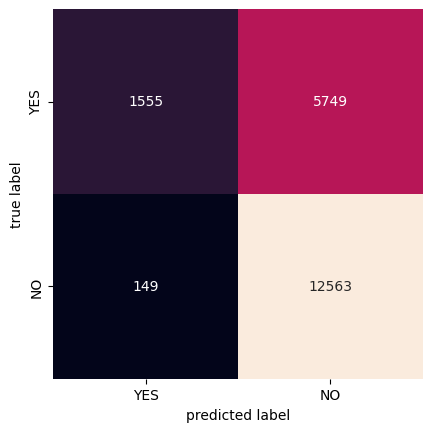

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2
)
nb = NaiveBayes()
nb.fit(X_train, y_train)
prediction = nb.predict(X_test)
evaluate_classification(prediction, y_test)

Accuracy: 0.7165
Precision: 0.8976
Recall: 0.2519
Confusion Matrix:


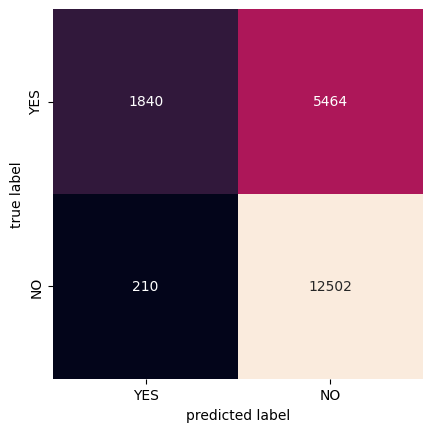

In [7]:
clf = GaussianNB()  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_classification(y_pred, y_test)